# Regression Models in R (tips)

In [172]:
if(!exists("Table1", mode="function")) source("mechkar.R")

In [173]:

library(readr)
library(dplyr)
library(ggplot2)


In [174]:
df <- read.csv("train.csv")
head(df)
dim(df)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,985
2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,801
3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,1349
4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,1562
5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,1600
6,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606


[1] 365  12

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# EDA

In [175]:
df["season_1"] = as.integer(df$season == 1)
df["season_2"] = as.integer(df$season == 2)
df["season_3"] = as.integer(df$season == 3)
df["season_4"] = as.integer(df$season == 4)

df["mnth_1"] = as.integer(df$mnth == 1)
df["mnth_2"] = as.integer(df$mnth == 2)
df["mnth_3"] = as.integer(df$mnth == 3)
df["mnth_4"] = as.integer(df$mnth == 4)
df["mnth_5"] = as.integer(df$mnth == 5)
df["mnth_6"] = as.integer(df$mnth == 6)
df["mnth_7"] = as.integer(df$mnth == 7)
df["mnth_8"] = as.integer(df$mnth == 8)
df["mnth_9"] = as.integer(df$mnth == 9)
df["mnth_10"] = as.integer(df$mnth == 10)
df["mnth_11"] = as.integer(df$mnth == 11)
df["mnth_12"] = as.integer(df$mnth == 12)

df["weekday_0"] = as.integer(df$weekday == 0)
df["weekday_1"] = as.integer(df$weekday == 1)
df["weekday_2"] = as.integer(df$weekday == 2)
df["weekday_3"] = as.integer(df$weekday == 3)
df["weekday_4"] = as.integer(df$weekday == 4)
df["weekday_5"] = as.integer(df$weekday == 5)
df["weekday_6"] = as.integer(df$weekday == 6)

df["weathersit_1"] = as.integer(df$weathersit == 1)
df["weathersit_2"] = as.integer(df$weathersit == 2)
df["weathersit_3"] = as.integer(df$weathersit == 3)

df["mnth"] <- NULL
df["weathersit"] <- NULL
df["weekday"] <- NULL
df["season"] <- NULL
df["atemp"] <- NULL


df$holiday <- as.factor(df$holiday)
df$workingday <- as.factor(df$workingday)

df["season_1"] = as.factor(df$season_1)
df["season_2"] = as.factor(df$season_2)
df["season_3"] = as.factor(df$season_3)
df["season_4"] = as.factor(df$season_4)

df["mnth_1"] = as.factor(df$mnth_1)
df["mnth_2"] = as.factor(df$mnth_2)
df["mnth_3"] = as.factor(df$mnth_3)
df["mnth_4"] = as.factor(df$mnth_4)
df["mnth_5"] = as.factor(df$mnth_5)
df["mnth_6"] = as.factor(df$mnth_6)
df["mnth_7"] = as.factor(df$mnth_7)
df["mnth_8"] = as.factor(df$mnth_8)
df["mnth_9"] = as.factor(df$mnth_9)
df["mnth_10"] = as.factor(df$mnth_10)
df["mnth_11"] = as.factor(df$mnth_11)
df["mnth_12"] = as.factor(df$mnth_12)

df["weekday_0"] = as.factor(df$weekday_0)
df["weekday_1"] = as.factor(df$weekday_1)
df["weekday_2"] = as.factor(df$weekday_2)
df["weekday_3"] = as.factor(df$weekday_3)
df["weekday_4"] = as.factor(df$weekday_4)
df["weekday_5"] = as.factor(df$weekday_5)
df["weekday_6"] = as.factor(df$weekday_6)

df["weathersit_1"] = as.factor(df$weathersit_1)
df["weathersit_2"] = as.factor(df$weathersit_2)
df["weathersit_3"] = as.factor(df$weathersit_3)




summary(df)

       id      holiday workingday      temp              hum        
 Min.   :  1   0:355   0:115      Min.   :0.05913   Min.   :0.0000  
 1st Qu.: 92   1: 10   1:250      1st Qu.:0.32500   1st Qu.:0.5383  
 Median :183                      Median :0.47917   Median :0.6475  
 Mean   :183                      Mean   :0.48666   Mean   :0.6437  
 3rd Qu.:274                      3rd Qu.:0.65667   3rd Qu.:0.7421  
 Max.   :365                      Max.   :0.84917   Max.   :0.9725  
   windspeed            cnt       season_1 season_2 season_3 season_4 mnth_1 
 Min.   :0.02239   Min.   : 431   0:275    0:273    0:271    0:276    0:334  
 1st Qu.:0.13558   1st Qu.:2132   1: 90    1: 92    1: 94    1: 89    1: 31  
 Median :0.18690   Median :3740                                              
 Mean   :0.19140   Mean   :3406                                              
 3rd Qu.:0.23508   3rd Qu.:4586                                              
 Max.   :0.50746   Max.   :6043                  

# DATASET PARTITION

In [176]:
tab1 <- train_test(data=df, train_name="train", test_name="test", prop=0.7, seed=5, tableone=TRUE)
tab1

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |================================================================      |  91%

Warning message in stats::chisq.test(data[[v]], data[[y]]):
"Chi-squared approximation may be incorrect"


  |====================================================================  |  97%

 

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,365,255,110,NA
id,Mean (SD),183.0 (105.5),183.7 (105.0),181.4 (107.2),NA
id,Median (IQR),183.0 (92.0-274.0),181.0 (92.5-272.5),184.5 (88.0-277.0),0.854
holiday,1,10 (2.7%),5 (2.0%),5 (4.5%),0.166
workingday,1,250 (68.5%),175 (68.6%),75 (68.2%),1
temp,Mean (SD),0.5 (0.2),0.5 (0.2),0.5 (0.2),NA
temp,Median (IQR),0.5 (0.3-0.7),0.5 (0.3-0.7),0.5 (0.3-0.7),0.633
hum,Mean (SD),0.6 (0.1),0.6 (0.2),0.7 (0.1),NA
hum,Median (IQR),0.6 (0.5-0.7),0.6 (0.5-0.7),0.6 (0.5-0.7),0.53


In [177]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

In [178]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


## SVM

In [8]:
#install.packages("liquidSVM")
library(liquidSVM)



Warning message:
"package 'liquidSVM' was built under R version 4.0.3"


In [9]:
cnames = names(train)
cnames <- cnames[c(2:11)]

variables_comb <- list()

# length(combn(cnames,3))
# combn(cnames,3)

counter <-  0
for(i in 1:10) {
    curr_combs <- combn(cnames,i)
    for(j in 1:(length(curr_combs)/i)){
        counter <- counter + 1
        curr_comb <- data.frame(curr_combs[,j])
        variables_comb[counter] <- curr_comb
    }
}   


In [10]:
# install.packages("svMisc")
require(svMisc)

Loading required package: svMisc

Warning message:
"package 'svMisc' was built under R version 4.0.3"

Attaching package: 'svMisc'


The following object is masked from 'package:utils':

    ?




In [43]:

err_res <- NULL
counter <- 0
for(curr_vars in variables_comb){
    
    counter <- counter + 1
    progress(counter * 100 / 1023)
    
    print(counter)
    print(curr_vars)
    
    outcome <- "cnt"
    variables <- curr_vars
    f <- as.formula( paste(outcome,  paste(variables, collapse = " + "), sep = " ~ "))

    mod9 <- svm(f, train, type = "eps-regression")
    
    pred9 <- predict(mod9, newdata=test)

    rmse(test$cnt,pred9)
    rmsle(test$cnt,pred9)
    err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod9", 
                                         RMSE=rmse(test$cnt,pred9), 
                                         RMSLE=rmsle(test$cnt,pred9),
                                         ind=counter))
    }



Progress:   0%  [1] 1
[1] "season"
Progress:   0%  [1] 2
[1] "mnth"
Progress:   0%  [1] 3
[1] "holiday"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   0%  [1] 4
[1] "weekday"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   0%  [1] 5
[1] "workingday"
Progress:   1%  [1] 6
[1] "weathersit"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   1%  [1] 7
[1] "temp"
Progress:   1%  [1] 8
[1] "atemp"
Progress:   1%  [1] 9
[1] "hum"
Progress:   1%  [1] 10
[1] "windspeed"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   1%  [1] 11
[1] "season" "mnth"  
Progress:   1%  [1] 12
[1] "season"  "holiday"
Progress:   1%  [1] 13
[1] "season"  "weekday"
Progress:   1%  [1] 14
[1] "season"     "workingday"
Progress:   1%  [1] 15
[1] "season"     "weathersit"
Progress:   2%  [1] 16
[1] "season" "temp"  


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:   2%  [1] 17
[1] "season" "atemp" 
Progress:   2%  [1] 18
[1] "season" "hum"   
Progress:   2%  [1] 19
[1] "season"    "windspeed"
Progress:   2%  [1] 20
[1] "mnth"    "holiday"
Progress:   2%  [1] 21
[1] "mnth"    "weekday"
Progress:   2%  [1] 22
[1] "mnth"       "workingday"
Progress:   2%  [1] 23
[1] "mnth"       "weathersit"
Progress:   2%  [1] 24
[1] "mnth" "temp"
Progress:   2%  [1] 25
[1] "mnth"  "atemp"
Progress:   3%  [1] 26
[1] "mnth" "hum" 
Progress:   3%  [1] 27
[1] "mnth"      "windspeed"
Progress:   3%  [1] 28
[1] "holiday" "weekday"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   3%  [1] 29
[1] "holiday"    "workingday"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   3%  [1] 30
[1] "holiday"    "weathersit"
Progress:   3%  [1] 31
[1] "holiday" "temp"   
Progress:   3%  [1] 32
[1] "holiday" "atemp"  
Progress:   3%  [1] 33
[1] "holiday" "hum"    
Progress:   3%  [1] 34
[1] "holiday"   "windspeed"
Progress:   3%  [1] 35
[1] "weekday"    "workingday"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   4%  [1] 36
[1] "weekday"    "weathersit"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   4%  [1] 37
[1] "weekday" "temp"   
Progress:   4%  [1] 38
[1] "weekday" "atemp"  
Progress:   4%  [1] 39
[1] "weekday" "hum"    
Progress:   4%  [1] 40
[1] "weekday"   "windspeed"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   4%  [1] 41
[1] "workingday" "weathersit"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   4%  [1] 42
[1] "workingday" "temp"      
Progress:   4%  [1] 43
[1] "workingday" "atemp"     
Progress:   4%  [1] 44
[1] "workingday" "hum"       
Progress:   4%  [1] 45
[1] "workingday" "windspeed" 
Progress:   4%  [1] 46
[1] "weathersit" "temp"      
Progress:   5%  [1] 47
[1] "weathersit" "atemp"     
Progress:   5%  [1] 48
[1] "weathersit" "hum"       
Progress:   5%  [1] 49
[1] "weathersit" "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:   5%  [1] 50
[1] "temp"  "atemp"
Progress:   5%  [1] 51
[1] "temp" "hum" 
Progress:   5%  [1] 52
[1] "temp"      "windspeed"
Progress:   5%  [1] 53
[1] "atemp" "hum"  
Progress:   5%  [1] 54
[1] "atemp"     "windspeed"
Progress:   5%  [1] 55
[1] "hum"       "windspeed"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:   5%  [1] 56
[1] "season"  "mnth"    "holiday"
Progress:   6%  [1] 57
[1] "season"  "mnth"    "weekday"
Progress:   6%  [1] 58
[1] "season"     "mnth"       "workingday"
Progress:   6%  [1] 59
[1] "season"     "mnth"       "weathersit"
Progress:   6%  [1] 60
[1] "season" "mnth"   "temp"  
Progress:   6%  [1] 61
[1] "season" "mnth"   "atemp" 
Progress:   6%  [1] 62
[1] "season" "mnth"   "hum"   
Progress:   6%  [1] 63
[1] "season"    "mnth"      "windspeed"
Progress:   6%  [1] 64
[1] "season"  "holiday" "weekday"
Progress:   6%  [1] 65
[1] "season"     "holiday"    "workingday"
Progress:   6%  [1] 66
[1] "season"     "holiday"    "weathersit"
Progress:   7%  [1] 67
[1] "season"  "holiday" "temp"   
Progress:   7%  [1] 68
[1] "season"  "holiday" "atemp"  
Progress:   7%  [1] 69
[1] "season"  "holiday" "hum"    
Progress:   7%  [1] 70
[1] "season"    "holiday"   "windspeed"
Progress:   7%  [1] 71
[1] "season"     "weekday"    "workingday"
Progress:   7%  [1] 72
[1] "season"     

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:   8%  [1] 84
[1] "season"     "weathersit" "hum"       
Progress:   8%  [1] 85
[1] "season"     "weathersit" "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:   8%  [1] 86
[1] "season" "temp"   "atemp" 
Progress:   9%  [1] 87
[1] "season" "temp"   "hum"   
Progress:   9%  [1] 88
[1] "season"    "temp"      "windspeed"
Progress:   9%  [1] 89
[1] "season" "atemp"  "hum"   
Progress:   9%  [1] 90
[1] "season"    "atemp"     "windspeed"
Progress:   9%  [1] 91
[1] "season"    "hum"       "windspeed"
Progress:   9%  [1] 92
[1] "mnth"    "holiday" "weekday"
Progress:   9%  [1] 93
[1] "mnth"       "holiday"    "workingday"
Progress:   9%  [1] 94
[1] "mnth"       "holiday"    "weathersit"
Progress:   9%  [1] 95
[1] "mnth"    "holiday" "temp"   
Progress:   9%  [1] 96
[1] "mnth"    "holiday" "atemp"  
Progress:   9%  [1] 97
[1] "mnth"    "holiday" "hum"    


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  10%  [1] 98
[1] "mnth"      "holiday"   "windspeed"
Progress:  10%  [1] 99
[1] "mnth"       "weekday"    "workingday"
Progress:  10%  [1] 100
[1] "mnth"       "weekday"    "weathersit"
Progress:  10%  [1] 101
[1] "mnth"    "weekday" "temp"   
Progress:  10%  [1] 102
[1] "mnth"    "weekday" "atemp"  
Progress:  10%  [1] 103
[1] "mnth"    "weekday" "hum"    
Progress:  10%  [1] 104
[1] "mnth"      "weekday"   "windspeed"
Progress:  10%  [1] 105
[1] "mnth"       "workingday" "weathersit"
Progress:  10%  [1] 106
[1] "mnth"       "workingday" "temp"      
Progress:  10%  [1] 107
[1] "mnth"       "workingday" "atemp"     
Progress:  11%  [1] 108
[1] "mnth"       "workingday" "hum"       
Progress:  11%  [1] 109
[1] "mnth"       "workingday" "windspeed" 
Progress:  11%  [1] 110
[1] "mnth"       "weathersit" "temp"      
Progress:  11%  [1] 111
[1] "mnth"       "weathersit" "atemp"     
Progress:  11%  [1] 112
[1] "mnth"       "weathersit" "hum"       
Progress:  11%  [1] 113
[1] "m

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  12%  [1] 121
[1] "holiday"    "weekday"    "weathersit"
Progress:  12%  [1] 122
[1] "holiday" "weekday" "temp"   
Progress:  12%  [1] 123
[1] "holiday" "weekday" "atemp"  
Progress:  12%  [1] 124
[1] "holiday" "weekday" "hum"    
Progress:  12%  [1] 125
[1] "holiday"   "weekday"   "windspeed"
Progress:  12%  [1] 126
[1] "holiday"    "workingday" "weathersit"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  12%  [1] 127
[1] "holiday"    "workingday" "temp"      
Progress:  13%  [1] 128
[1] "holiday"    "workingday" "atemp"     
Progress:  13%  [1] 129
[1] "holiday"    "workingday" "hum"       
Progress:  13%  [1] 130
[1] "holiday"    "workingday" "windspeed" 
Progress:  13%  [1] 131
[1] "holiday"    "weathersit" "temp"      
Progress:  13%  [1] 132
[1] "holiday"    "weathersit" "atemp"     
Progress:  13%  [1] 133
[1] "holiday"    "weathersit" "hum"       
Progress:  13%  [1] 134
[1] "holiday"    "weathersit" "windspeed" 
Progress:  13%  [1] 135
[1] "holiday" "temp"    "atemp"  
Progress:  13%  [1] 136
[1] "holiday" "temp"    "hum"    
Progress:  13%  [1] 137
[1] "holiday"   "temp"      "windspeed"
Progress:  13%  [1] 138
[1] "holiday" "atemp"   "hum"    
Progress:  14%  [1] 139
[1] "holiday"   "atemp"     "windspeed"
Progress:  14%  [1] 140
[1] "holiday"   "hum"       "windspeed"
Progress:  14%  [1] 141
[1] "weekday"    "workingday" "weathersit"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  14%  [1] 142
[1] "weekday"    "workingday" "temp"      
Progress:  14%  [1] 143
[1] "weekday"    "workingday" "atemp"     
Progress:  14%  [1] 144
[1] "weekday"    "workingday" "hum"       
Progress:  14%  [1] 145
[1] "weekday"    "workingday" "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  14%  [1] 146
[1] "weekday"    "weathersit" "temp"      
Progress:  14%  [1] 147
[1] "weekday"    "weathersit" "atemp"     
Progress:  14%  [1] 148
[1] "weekday"    "weathersit" "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  15%  [1] 149
[1] "weekday"    "weathersit" "windspeed" 
Progress:  15%  [1] 150
[1] "weekday" "temp"    "atemp"  
Progress:  15%  [1] 151
[1] "weekday" "temp"    "hum"    
Progress:  15%  [1] 152
[1] "weekday"   "temp"      "windspeed"
Progress:  15%  [1] 153
[1] "weekday" "atemp"   "hum"    
Progress:  15%  [1] 154
[1] "weekday"   "atemp"     "windspeed"
Progress:  15%  [1] 155
[1] "weekday"   "hum"       "windspeed"
Progress:  15%  [1] 156
[1] "workingday" "weathersit" "temp"      
Progress:  15%  [1] 157
[1] "workingday" "weathersit" "atemp"     


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  15%  [1] 158
[1] "workingday" "weathersit" "hum"       
Progress:  16%  [1] 159
[1] "workingday" "weathersit" "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  16%  [1] 160
[1] "workingday" "temp"       "atemp"     
Progress:  16%  [1] 161
[1] "workingday" "temp"       "hum"       
Progress:  16%  [1] 162
[1] "workingday" "temp"       "windspeed" 
Progress:  16%  [1] 163
[1] "workingday" "atemp"      "hum"       
Progress:  16%  [1] 164
[1] "workingday" "atemp"      "windspeed" 
Progress:  16%  [1] 165
[1] "workingday" "hum"        "windspeed" 
Progress:  16%  [1] 166
[1] "weathersit" "temp"       "atemp"     


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  16%  [1] 167
[1] "weathersit" "temp"       "hum"       
Progress:  16%  [1] 168
[1] "weathersit" "temp"       "windspeed" 
Progress:  17%  [1] 169
[1] "weathersit" "atemp"      "hum"       
Progress:  17%  [1] 170
[1] "weathersit" "atemp"      "windspeed" 
Progress:  17%  [1] 171
[1] "weathersit" "hum"        "windspeed" 
Progress:  17%  [1] 172
[1] "temp"  "atemp" "hum"  
Progress:  17%  [1] 173
[1] "temp"      "atemp"     "windspeed"
Progress:  17%  [1] 174
[1] "temp"      "hum"       "windspeed"
Progress:  17%  [1] 175
[1] "atemp"     "hum"       "windspeed"
Progress:  17%  [1] 176
[1] "season"  "mnth"    "holiday" "weekday"
Progress:  17%  [1] 177
[1] "season"     "mnth"       "holiday"    "workingday"
Progress:  17%  [1] 178
[1] "season"     "mnth"       "holiday"    "weathersit"
Progress:  17%  [1] 179
[1] "season"  "mnth"    "holiday" "temp"   
Progress:  18%  [1] 180
[1] "season"  "mnth"    "holiday" "atemp"  
Progress:  18%  [1] 181
[1] "season"  "mnth"    "holiday"

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  21%  [1] 214
[1] "season"     "holiday"    "workingday" "windspeed" 
Progress:  21%  [1] 215
[1] "season"     "holiday"    "weathersit" "temp"      
Progress:  21%  [1] 216
[1] "season"     "holiday"    "weathersit" "atemp"     
Progress:  21%  [1] 217
[1] "season"     "holiday"    "weathersit" "hum"       
Progress:  21%  [1] 218
[1] "season"     "holiday"    "weathersit" "windspeed" 
Progress:  21%  [1] 219
[1] "season"  "holiday" "temp"    "atemp"  
Progress:  22%  [1] 220
[1] "season"  "holiday" "temp"    "hum"    
Progress:  22%  [1] 221
[1] "season"    "holiday"   "temp"      "windspeed"
Progress:  22%  [1] 222
[1] "season"  "holiday" "atemp"   "hum"    
Progress:  22%  [1] 223
[1] "season"    "holiday"   "atemp"     "windspeed"
Progress:  22%  [1] 224
[1] "season"    "holiday"   "hum"       "windspeed"
Progress:  22%  [1] 225
[1] "season"     "weekday"    "workingday" "weathersit"
Progress:  22%  [1] 226
[1] "season"     "weekday"    "workingday" "temp"      
Progress

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  24%  [1] 248
[1] "season"     "workingday" "atemp"      "windspeed" 
Progress:  24%  [1] 249
[1] "season"     "workingday" "hum"        "windspeed" 
Progress:  24%  [1] 250
[1] "season"     "weathersit" "temp"       "atemp"     
Progress:  25%  [1] 251
[1] "season"     "weathersit" "temp"       "hum"       
Progress:  25%  [1] 252
[1] "season"     "weathersit" "temp"       "windspeed" 
Progress:  25%  [1] 253
[1] "season"     "weathersit" "atemp"      "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  25%  [1] 254
[1] "season"     "weathersit" "atemp"      "windspeed" 
Progress:  25%  [1] 255
[1] "season"     "weathersit" "hum"        "windspeed" 
Progress:  25%  [1] 256
[1] "season" "temp"   "atemp"  "hum"   
Progress:  25%  [1] 257
[1] "season"    "temp"      "atemp"     "windspeed"
Progress:  25%  [1] 258
[1] "season"    "temp"      "hum"       "windspeed"
Progress:  25%  [1] 259
[1] "season"    "atemp"     "hum"       "windspeed"
Progress:  25%  [1] 260
[1] "mnth"       "holiday"    "weekday"    "workingday"
Progress:  26%  [1] 261
[1] "mnth"       "holiday"    "weekday"    "weathersit"
Progress:  26%  [1] 262
[1] "mnth"    "holiday" "weekday" "temp"   
Progress:  26%  [1] 263
[1] "mnth"    "holiday" "weekday" "atemp"  
Progress:  26%  [1] 264
[1] "mnth"    "holiday" "weekday" "hum"    


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  26%  [1] 265
[1] "mnth"      "holiday"   "weekday"   "windspeed"
Progress:  26%  [1] 266
[1] "mnth"       "holiday"    "workingday" "weathersit"
Progress:  26%  [1] 267
[1] "mnth"       "holiday"    "workingday" "temp"      
Progress:  26%  [1] 268
[1] "mnth"       "holiday"    "workingday" "atemp"     
Progress:  26%  [1] 269
[1] "mnth"       "holiday"    "workingday" "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  26%  [1] 270
[1] "mnth"       "holiday"    "workingday" "windspeed" 
Progress:  26%  [1] 271
[1] "mnth"       "holiday"    "weathersit" "temp"      
Progress:  27%  [1] 272
[1] "mnth"       "holiday"    "weathersit" "atemp"     
Progress:  27%  [1] 273
[1] "mnth"       "holiday"    "weathersit" "hum"       
Progress:  27%  [1] 274
[1] "mnth"       "holiday"    "weathersit" "windspeed" 
Progress:  27%  [1] 275
[1] "mnth"    "holiday" "temp"    "atemp"  
Progress:  27%  [1] 276
[1] "mnth"    "holiday" "temp"    "hum"    
Progress:  27%  [1] 277
[1] "mnth"      "holiday"   "temp"      "windspeed"
Progress:  27%  [1] 278
[1] "mnth"    "holiday" "atemp"   "hum"    
Progress:  27%  [1] 279
[1] "mnth"      "holiday"   "atemp"     "windspeed"
Progress:  27%  [1] 280
[1] "mnth"      "holiday"   "hum"       "windspeed"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  27%  [1] 281
[1] "mnth"       "weekday"    "workingday" "weathersit"
Progress:  28%  [1] 282
[1] "mnth"       "weekday"    "workingday" "temp"      
Progress:  28%  [1] 283
[1] "mnth"       "weekday"    "workingday" "atemp"     
Progress:  28%  [1] 284
[1] "mnth"       "weekday"    "workingday" "hum"       
Progress:  28%  [1] 285
[1] "mnth"       "weekday"    "workingday" "windspeed" 
Progress:  28%  [1] 286
[1] "mnth"       "weekday"    "weathersit" "temp"      
Progress:  28%  [1] 287
[1] "mnth"       "weekday"    "weathersit" "atemp"     
Progress:  28%  [1] 288
[1] "mnth"       "weekday"    "weathersit" "hum"       
Progress:  28%  [1] 289
[1] "mnth"       "weekday"    "weathersit" "windspeed" 
Progress:  28%  [1] 290
[1] "mnth"    "weekday" "temp"    "atemp"  
Progress:  28%  [1] 291
[1] "mnth"    "weekday" "temp"    "hum"    
Progress:  29%  [1] 292
[1] "mnth"      "weekday"   "temp"      "windspeed"
Progress:  29%  [1] 293
[1] "mnth"    "weekday" "atemp"   "hum"    


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  29%  [1] 296
[1] "mnth"       "workingday" "weathersit" "temp"      
Progress:  29%  [1] 297
[1] "mnth"       "workingday" "weathersit" "atemp"     
Progress:  29%  [1] 298
[1] "mnth"       "workingday" "weathersit" "hum"       
Progress:  29%  [1] 299
[1] "mnth"       "workingday" "weathersit" "windspeed" 
Progress:  29%  [1] 300
[1] "mnth"       "workingday" "temp"       "atemp"     
Progress:  29%  [1] 301
[1] "mnth"       "workingday" "temp"       "hum"       
Progress:  30%  [1] 302
[1] "mnth"       "workingday" "temp"       "windspeed" 
Progress:  30%  [1] 303
[1] "mnth"       "workingday" "atemp"      "hum"       
Progress:  30%  [1] 304
[1] "mnth"       "workingday" "atemp"      "windspeed" 
Progress:  30%  [1] 305
[1] "mnth"       "workingday" "hum"        "windspeed" 
Progress:  30%  [1] 306
[1] "mnth"       "weathersit" "temp"       "atemp"     
Progress:  30%  [1] 307
[1] "mnth"       "weathersit" "temp"       "hum"       
Progress:  30%  [1] 308
[1] "mnth"      

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  31%  [1] 317
[1] "holiday"    "weekday"    "workingday" "temp"      
Progress:  31%  [1] 318
[1] "holiday"    "weekday"    "workingday" "atemp"     
Progress:  31%  [1] 319
[1] "holiday"    "weekday"    "workingday" "hum"       
Progress:  31%  [1] 320
[1] "holiday"    "weekday"    "workingday" "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  31%  [1] 321
[1] "holiday"    "weekday"    "weathersit" "temp"      
Progress:  31%  [1] 322
[1] "holiday"    "weekday"    "weathersit" "atemp"     
Progress:  32%  [1] 323
[1] "holiday"    "weekday"    "weathersit" "hum"       
Progress:  32%  [1] 324
[1] "holiday"    "weekday"    "weathersit" "windspeed" 
Progress:  32%  [1] 325
[1] "holiday" "weekday" "temp"    "atemp"  
Progress:  32%  [1] 326
[1] "holiday" "weekday" "temp"    "hum"    
Progress:  32%  [1] 327
[1] "holiday"   "weekday"   "temp"      "windspeed"


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  32%  [1] 328
[1] "holiday" "weekday" "atemp"   "hum"    
Progress:  32%  [1] 329
[1] "holiday"   "weekday"   "atemp"     "windspeed"
Progress:  32%  [1] 330
[1] "holiday"   "weekday"   "hum"       "windspeed"
Progress:  32%  [1] 331
[1] "holiday"    "workingday" "weathersit" "temp"      
Progress:  32%  [1] 332
[1] "holiday"    "workingday" "weathersit" "atemp"     
Progress:  33%  [1] 333
[1] "holiday"    "workingday" "weathersit" "hum"       
Progress:  33%  [1] 334
[1] "holiday"    "workingday" "weathersit" "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  33%  [1] 335
[1] "holiday"    "workingday" "temp"       "atemp"     
Progress:  33%  [1] 336
[1] "holiday"    "workingday" "temp"       "hum"       
Progress:  33%  [1] 337
[1] "holiday"    "workingday" "temp"       "windspeed" 


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  33%  [1] 338
[1] "holiday"    "workingday" "atemp"      "hum"       
Progress:  33%  [1] 339
[1] "holiday"    "workingday" "atemp"      "windspeed" 
Progress:  33%  [1] 340
[1] "holiday"    "workingday" "hum"        "windspeed" 
Progress:  33%  [1] 341
[1] "holiday"    "weathersit" "temp"       "atemp"     
Progress:  33%  [1] 342
[1] "holiday"    "weathersit" "temp"       "hum"       
Progress:  34%  [1] 343
[1] "holiday"    "weathersit" "temp"       "windspeed" 
Progress:  34%  [1] 344
[1] "holiday"    "weathersit" "atemp"      "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  34%  [1] 345
[1] "holiday"    "weathersit" "atemp"      "windspeed" 
Progress:  34%  [1] 346
[1] "holiday"    "weathersit" "hum"        "windspeed" 
Progress:  34%  [1] 347
[1] "holiday" "temp"    "atemp"   "hum"    
Progress:  34%  [1] 348
[1] "holiday"   "temp"      "atemp"     "windspeed"
Progress:  34%  [1] 349
[1] "holiday"   "temp"      "hum"       "windspeed"
Progress:  34%  [1] 350
[1] "holiday"   "atemp"     "hum"       "windspeed"
Progress:  34%  [1] 351
[1] "weekday"    "workingday" "weathersit" "temp"      
Progress:  34%  [1] 352
[1] "weekday"    "workingday" "weathersit" "atemp"     
Progress:  35%  [1] 353
[1] "weekday"    "workingday" "weathersit" "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  35%  [1] 354
[1] "weekday"    "workingday" "weathersit" "windspeed" 
Progress:  35%  [1] 355
[1] "weekday"    "workingday" "temp"       "atemp"     
Progress:  35%  [1] 356
[1] "weekday"    "workingday" "temp"       "hum"       


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  35%  [1] 357
[1] "weekday"    "workingday" "temp"       "windspeed" 
Progress:  35%  [1] 358
[1] "weekday"    "workingday" "atemp"      "hum"       
Progress:  35%  [1] 359
[1] "weekday"    "workingday" "atemp"      "windspeed" 
Progress:  35%  [1] 360
[1] "weekday"    "workingday" "hum"        "windspeed" 
Progress:  35%  [1] 361
[1] "weekday"    "weathersit" "temp"       "atemp"     
Progress:  35%  [1] 362
[1] "weekday"    "weathersit" "temp"       "hum"       
Progress:  35%  [1] 363
[1] "weekday"    "weathersit" "temp"       "windspeed" 
Progress:  36%  [1] 364
[1] "weekday"    "weathersit" "atemp"      "hum"       
Progress:  36%  [1] 365
[1] "weekday"    "weathersit" "atemp"      "windspeed" 
Progress:  36%  [1] 366
[1] "weekday"    "weathersit" "hum"        "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  36%  [1] 367
[1] "weekday" "temp"    "atemp"   "hum"    
Progress:  36%  [1] 368
[1] "weekday"   "temp"      "atemp"     "windspeed"
Progress:  36%  [1] 369
[1] "weekday"   "temp"      "hum"       "windspeed"
Progress:  36%  [1] 370
[1] "weekday"   "atemp"     "hum"       "windspeed"
Progress:  36%  [1] 371
[1] "workingday" "weathersit" "temp"       "atemp"     
Progress:  36%  [1] 372
[1] "workingday" "weathersit" "temp"       "hum"       
Progress:  36%  [1] 373
[1] "workingday" "weathersit" "temp"       "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  37%  [1] 374
[1] "workingday" "weathersit" "atemp"      "hum"       
Progress:  37%  [1] 375
[1] "workingday" "weathersit" "atemp"      "windspeed" 


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  37%  [1] 376
[1] "workingday" "weathersit" "hum"        "windspeed" 
Progress:  37%  [1] 377
[1] "workingday" "temp"       "atemp"      "hum"       
Progress:  37%  [1] 378
[1] "workingday" "temp"       "atemp"      "windspeed" 
Progress:  37%  [1] 379
[1] "workingday" "temp"       "hum"        "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  37%  [1] 380
[1] "workingday" "atemp"      "hum"        "windspeed" 
Progress:  37%  [1] 381
[1] "weathersit" "temp"       "atemp"      "hum"       
Progress:  37%  [1] 382
[1] "weathersit" "temp"       "atemp"      "windspeed" 
Progress:  37%  [1] 383
[1] "weathersit" "temp"       "hum"        "windspeed" 
Progress:  38%  [1] 384
[1] "weathersit" "atemp"      "hum"        "windspeed" 
Progress:  38%  [1] 385
[1] "temp"      "atemp"     "hum"       "windspeed"
Progress:  38%  [1] 386
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
Progress:  38%  [1] 387
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  38%  [1] 388
[1] "season"  "mnth"    "holiday" "weekday" "temp"   
Progress:  38%  [1] 389
[1] "season"  "mnth"    "holiday" "weekday" "atemp"  
Progress:  38%  [1] 390
[1] "season"  "mnth"    "holiday" "weekday" "hum"    
Progress:  38%  [1] 391
[1] "season"    "mnth"      "holiday"   "weekday"   "windspeed"
Progress:  38%  [1] 392
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
Progress:  38%  [1] 393
[1] "season"     "mnth"       "holiday"    "workingday" "temp"      
Progress:  39%  [1] 394
[1] "season"     "mnth"       "holiday"    "workingday" "atemp"     
Progress:  39%  [1] 395
[1] "season"     "mnth"       "holiday"    "workingday" "hum"       
Progress:  39%  [1] 396
[1] "season"     "mnth"       "holiday"    "workingday" "windspeed" 
Progress:  39%  [1] 397
[1] "season"     "mnth"       "holiday"    "weathersit" "temp"      
Progress:  39%  [1] 398
[1] "season"     "mnth"       "holiday"    "weathersit" "atemp"     
Progress:  39%  [1] 399
[1]

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  40%  [1] 411
[1] "season"     "mnth"       "weekday"    "workingday" "windspeed" 
Progress:  40%  [1] 412
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
Progress:  40%  [1] 413
[1] "season"     "mnth"       "weekday"    "weathersit" "atemp"     
Progress:  40%  [1] 414
[1] "season"     "mnth"       "weekday"    "weathersit" "hum"       
Progress:  41%  [1] 415
[1] "season"     "mnth"       "weekday"    "weathersit" "windspeed" 
Progress:  41%  [1] 416
[1] "season"  "mnth"    "weekday" "temp"    "atemp"  
Progress:  41%  [1] 417
[1] "season"  "mnth"    "weekday" "temp"    "hum"    
Progress:  41%  [1] 418
[1] "season"    "mnth"      "weekday"   "temp"      "windspeed"
Progress:  41%  [1] 419
[1] "season"  "mnth"    "weekday" "atemp"   "hum"    
Progress:  41%  [1] 420
[1] "season"    "mnth"      "weekday"   "atemp"     "windspeed"
Progress:  41%  [1] 421
[1] "season"    "mnth"      "weekday"   "hum"       "windspeed"
Progress:  41%  [1] 422
[1] "season" 

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  42%  [1] 427
[1] "season"     "mnth"       "workingday" "temp"       "hum"       
Progress:  42%  [1] 428
[1] "season"     "mnth"       "workingday" "temp"       "windspeed" 
Progress:  42%  [1] 429
[1] "season"     "mnth"       "workingday" "atemp"      "hum"       
Progress:  42%  [1] 430
[1] "season"     "mnth"       "workingday" "atemp"      "windspeed" 
Progress:  42%  [1] 431
[1] "season"     "mnth"       "workingday" "hum"        "windspeed" 
Progress:  42%  [1] 432
[1] "season"     "mnth"       "weathersit" "temp"       "atemp"     
Progress:  42%  [1] 433
[1] "season"     "mnth"       "weathersit" "temp"       "hum"       
Progress:  42%  [1] 434
[1] "season"     "mnth"       "weathersit" "temp"       "windspeed" 
Progress:  43%  [1] 435
[1] "season"     "mnth"       "weathersit" "atemp"      "hum"       
Progress:  43%  [1] 436
[1] "season"     "mnth"       "weathersit" "atemp"      "windspeed" 
Progress:  43%  [1] 437
[1] "season"     "mnth"       "weathersit" "hu

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  43%  [1] 445
[1] "season"     "holiday"    "weekday"    "workingday" "hum"       
Progress:  44%  [1] 446
[1] "season"     "holiday"    "weekday"    "workingday" "windspeed" 
Progress:  44%  [1] 447
[1] "season"     "holiday"    "weekday"    "weathersit" "temp"      
Progress:  44%  [1] 448
[1] "season"     "holiday"    "weekday"    "weathersit" "atemp"     
Progress:  44%  [1] 449
[1] "season"     "holiday"    "weekday"    "weathersit" "hum"       
Progress:  44%  [1] 450
[1] "season"     "holiday"    "weekday"    "weathersit" "windspeed" 
Progress:  44%  [1] 451
[1] "season"  "holiday" "weekday" "temp"    "atemp"  
Progress:  44%  [1] 452
[1] "season"  "holiday" "weekday" "temp"    "hum"    
Progress:  44%  [1] 453
[1] "season"    "holiday"   "weekday"   "temp"      "windspeed"
Progress:  44%  [1] 454
[1] "season"  "holiday" "weekday" "atemp"   "hum"    
Progress:  44%  [1] 455
[1] "season"    "holiday"   "weekday"   "atemp"     "windspeed"
Progress:  45%  [1] 456
[1] "sea

Progress:  52%  [1] 535
[1] "mnth"       "holiday"    "workingday" "atemp"      "windspeed" 
Progress:  52%  [1] 536
[1] "mnth"       "holiday"    "workingday" "hum"        "windspeed" 
Progress:  52%  [1] 537
[1] "mnth"       "holiday"    "weathersit" "temp"       "atemp"     
Progress:  53%  [1] 538
[1] "mnth"       "holiday"    "weathersit" "temp"       "hum"       
Progress:  53%  [1] 539
[1] "mnth"       "holiday"    "weathersit" "temp"       "windspeed" 
Progress:  53%  [1] 540
[1] "mnth"       "holiday"    "weathersit" "atemp"      "hum"       
Progress:  53%  [1] 541
[1] "mnth"       "holiday"    "weathersit" "atemp"      "windspeed" 
Progress:  53%  [1] 542
[1] "mnth"       "holiday"    "weathersit" "hum"        "windspeed" 
Progress:  53%  [1] 543
[1] "mnth"    "holiday" "temp"    "atemp"   "hum"    
Progress:  53%  [1] 544
[1] "mnth"      "holiday"   "temp"      "atemp"     "windspeed"


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  53%  [1] 545
[1] "mnth"      "holiday"   "temp"      "hum"       "windspeed"
Progress:  53%  [1] 546
[1] "mnth"      "holiday"   "atemp"     "hum"       "windspeed"
Progress:  53%  [1] 547
[1] "mnth"       "weekday"    "workingday" "weathersit" "temp"      
Progress:  54%  [1] 548
[1] "mnth"       "weekday"    "workingday" "weathersit" "atemp"     
Progress:  54%  [1] 549
[1] "mnth"       "weekday"    "workingday" "weathersit" "hum"       
Progress:  54%  [1] 550
[1] "mnth"       "weekday"    "workingday" "weathersit" "windspeed" 
Progress:  54%  [1] 551
[1] "mnth"       "weekday"    "workingday" "temp"       "atemp"     
Progress:  54%  [1] 552
[1] "mnth"       "weekday"    "workingday" "temp"       "hum"       
Progress:  54%  [1] 553
[1] "mnth"       "weekday"    "workingday" "temp"       "windspeed" 
Progress:  54%  [1] 554
[1] "mnth"       "weekday"    "workingday" "atemp"      "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  54%  [1] 555
[1] "mnth"       "weekday"    "workingday" "atemp"      "windspeed" 
Progress:  54%  [1] 556
[1] "mnth"       "weekday"    "workingday" "hum"        "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  54%  [1] 557
[1] "mnth"       "weekday"    "weathersit" "temp"       "atemp"     
Progress:  55%  [1] 558
[1] "mnth"       "weekday"    "weathersit" "temp"       "hum"       
Progress:  55%  [1] 559
[1] "mnth"       "weekday"    "weathersit" "temp"       "windspeed" 
Progress:  55%  [1] 560
[1] "mnth"       "weekday"    "weathersit" "atemp"      "hum"       
Progress:  55%  [1] 561
[1] "mnth"       "weekday"    "weathersit" "atemp"      "windspeed" 
Progress:  55%  [1] 562
[1] "mnth"       "weekday"    "weathersit" "hum"        "windspeed" 
Progress:  55%  [1] 563
[1] "mnth"    "weekday" "temp"    "atemp"   "hum"    
Progress:  55%  [1] 564
[1] "mnth"      "weekday"   "temp"      "atemp"     "windspeed"
Progress:  55%  [1] 565
[1] "mnth"      "weekday"   "temp"      "hum"       "windspeed"
Progress:  55%  [1] 566
[1] "mnth"      "weekday"   "atemp"     "hum"       "windspeed"
Progress:  55%  [1] 567
[1] "mnth"       "workingday" "weathersit" "temp"       "atemp"     
Progres

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  58%  [1] 590
[1] "holiday"    "weekday"    "workingday" "atemp"      "windspeed" 
Progress:  58%  [1] 591
[1] "holiday"    "weekday"    "workingday" "hum"        "windspeed" 
Progress:  58%  [1] 592
[1] "holiday"    "weekday"    "weathersit" "temp"       "atemp"     
Progress:  58%  [1] 593
[1] "holiday"    "weekday"    "weathersit" "temp"       "hum"       
Progress:  58%  [1] 594
[1] "holiday"    "weekday"    "weathersit" "temp"       "windspeed" 
Progress:  58%  [1] 595
[1] "holiday"    "weekday"    "weathersit" "atemp"      "hum"       
Progress:  58%  [1] 596
[1] "holiday"    "weekday"    "weathersit" "atemp"      "windspeed" 
Progress:  58%  [1] 597
[1] "holiday"    "weekday"    "weathersit" "hum"        "windspeed" 
Progress:  58%  [1] 598
[1] "holiday" "weekday" "temp"    "atemp"   "hum"    
Progress:  59%  [1] 599
[1] "holiday"   "weekday"   "temp"      "atemp"     "windspeed"
Progress:  59%  [1] 600
[1] "holiday"   "weekday"   "temp"      "hum"       "windspeed"
Pr

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  59%  [1] 606
[1] "holiday"    "workingday" "weathersit" "atemp"      "windspeed" 
Progress:  59%  [1] 607
[1] "holiday"    "workingday" "weathersit" "hum"        "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  59%  [1] 608
[1] "holiday"    "workingday" "temp"       "atemp"      "hum"       
Progress:  60%  [1] 609
[1] "holiday"    "workingday" "temp"       "atemp"      "windspeed" 
Progress:  60%  [1] 610
[1] "holiday"    "workingday" "temp"       "hum"        "windspeed" 


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  60%  [1] 611
[1] "holiday"    "workingday" "atemp"      "hum"        "windspeed" 
Progress:  60%  [1] 612
[1] "holiday"    "weathersit" "temp"       "atemp"      "hum"       
Progress:  60%  [1] 613
[1] "holiday"    "weathersit" "temp"       "atemp"      "windspeed" 
Progress:  60%  [1] 614
[1] "holiday"    "weathersit" "temp"       "hum"        "windspeed" 
Progress:  60%  [1] 615
[1] "holiday"    "weathersit" "atemp"      "hum"        "windspeed" 
Progress:  60%  [1] 616
[1] "holiday"   "temp"      "atemp"     "hum"       "windspeed"
Progress:  60%  [1] 617
[1] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
Progress:  60%  [1] 618
[1] "weekday"    "workingday" "weathersit" "temp"       "hum"       
Progress:  61%  [1] 619
[1] "weekday"    "workingday" "weathersit" "temp"       "windspeed" 


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  61%  [1] 620
[1] "weekday"    "workingday" "weathersit" "atemp"      "hum"       
Progress:  61%  [1] 621
[1] "weekday"    "workingday" "weathersit" "atemp"      "windspeed" 
Progress:  61%  [1] 622
[1] "weekday"    "workingday" "weathersit" "hum"        "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using max_gamma=25"


Progress:  61%  [1] 623
[1] "weekday"    "workingday" "temp"       "atemp"      "hum"       
Progress:  61%  [1] 624
[1] "weekday"    "workingday" "temp"       "atemp"      "windspeed" 
Progress:  61%  [1] 625
[1] "weekday"    "workingday" "temp"       "hum"        "windspeed" 
Progress:  61%  [1] 626
[1] "weekday"    "workingday" "atemp"      "hum"        "windspeed" 
Progress:  61%  [1] 627
[1] "weekday"    "weathersit" "temp"       "atemp"      "hum"       
Progress:  61%  [1] 628
[1] "weekday"    "weathersit" "temp"       "atemp"      "windspeed" 
Progress:  61%  [1] 629
[1] "weekday"    "weathersit" "temp"       "hum"        "windspeed" 
Progress:  62%  [1] 630
[1] "weekday"    "weathersit" "atemp"      "hum"        "windspeed" 
Progress:  62%  [1] 631
[1] "weekday"   "temp"      "atemp"     "hum"       "windspeed"
Progress:  62%  [1] 632
[1] "workingday" "weathersit" "temp"       "atemp"      "hum"       
Progress:  62%  [1] 633
[1] "workingday" "weathersit" "temp"       "atemp" 

Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  62%  [1] 637
[1] "weathersit" "temp"       "atemp"      "hum"        "windspeed" 
Progress:  62%  [1] 638
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit"


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  62%  [1] 639
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "temp"      
Progress:  63%  [1] 640
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "atemp"     


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  63%  [1] 641
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "hum"       
Progress:  63%  [1] 642
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  63%  [1] 643
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"      
Progress:  63%  [1] 644
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "atemp"     
Progress:  63%  [1] 645
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "hum"       
Progress:  63%  [1] 646
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "windspeed" 
Progress:  63%  [1] 647
[1] "season"  "mnth"    "holiday" "weekday" "temp"    "atemp"  
Progress:  63%  [1] 648
[1] "season"  "mnth"    "holiday" "weekday" "temp"    "hum"    


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  63%  [1] 649
[1] "season"    "mnth"      "holiday"   "weekday"   "temp"      "windspeed"
Progress:  64%  [1] 650
[1] "season"  "mnth"    "holiday" "weekday" "atemp"   "hum"    
Progress:  64%  [1] 651
[1] "season"    "mnth"      "holiday"   "weekday"   "atemp"     "windspeed"
Progress:  64%  [1] 652
[1] "season"    "mnth"      "holiday"   "weekday"   "hum"       "windspeed"
Progress:  64%  [1] 653
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"      
Progress:  64%  [1] 654
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "atemp"     
Progress:  64%  [1] 655
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "hum"       
Progress:  64%  [1] 656
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "windspeed" 
Progress:  64%  [1] 657
[1] "season"     "mnth"       "holiday"    "workingday" "temp"      
[6] "atemp"     
Progress:  64%  [1] 658
[1] "season"     "mnth"       "holiday

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  66%  [1] 671
[1] "season"    "mnth"      "holiday"   "temp"      "hum"       "windspeed"
Progress:  66%  [1] 672
[1] "season"    "mnth"      "holiday"   "atemp"     "hum"       "windspeed"
Progress:  66%  [1] 673
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "temp"      
Progress:  66%  [1] 674
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "atemp"     
Progress:  66%  [1] 675
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "hum"       
Progress:  66%  [1] 676
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "windspeed" 
Progress:  66%  [1] 677
[1] "season"     "mnth"       "weekday"    "workingday" "temp"      
[6] "atemp"     
Progress:  66%  [1] 678
[1] "season"     "mnth"       "weekday"    "workingday" "temp"      
[6] "hum"       
Progress:  66%  [1] 679
[1] "season"     "mnth"       "weekday"    "workingday" "temp"      
[6] "windspeed" 
Progress:  66%  [1] 680
[1] "s

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  67%  [1] 683
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "atemp"     
Progress:  67%  [1] 684
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  67%  [1] 685
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "windspeed" 
Progress:  67%  [1] 686
[1] "season"     "mnth"       "weekday"    "weathersit" "atemp"     
[6] "hum"       
Progress:  67%  [1] 687
[1] "season"     "mnth"       "weekday"    "weathersit" "atemp"     
[6] "windspeed" 
Progress:  67%  [1] 688
[1] "season"     "mnth"       "weekday"    "weathersit" "hum"       
[6] "windspeed" 
Progress:  67%  [1] 689
[1] "season"  "mnth"    "weekday" "temp"    "atemp"   "hum"    
Progress:  67%  [1] 690
[1] "season"    "mnth"      "weekday"   "temp"      "atemp"     "windspeed"
Progress:  68%  [1] 691
[1] "season"    "mnth"      "weekday"   "temp"      "hum"       "windspeed"
Progress:  68%  [1] 692
[1] "season"    "mnth"      "weekday"   "atemp"     "hum"       "windspeed"
Progress:  68%  [1] 693
[1] "season"     "mnth"       "workingday" "weathersit" "temp"      
[6] "atemp"     
Progress:  68%  [1] 694
[1] "season"     "mnth"       "working

Progress:  74%  [1] 761
[1] "season"     "workingday" "weathersit" "atemp"      "hum"       
[6] "windspeed" 
Progress:  74%  [1] 762
[1] "season"     "workingday" "temp"       "atemp"      "hum"       
[6] "windspeed" 
Progress:  75%  [1] 763
[1] "season"     "weathersit" "temp"       "atemp"      "hum"       
[6] "windspeed" 
Progress:  75%  [1] 764
[1] "mnth"       "holiday"    "weekday"    "workingday" "weathersit"
[6] "temp"      
Progress:  75%  [1] 765
[1] "mnth"       "holiday"    "weekday"    "workingday" "weathersit"
[6] "atemp"     
Progress:  75%  [1] 766
[1] "mnth"       "holiday"    "weekday"    "workingday" "weathersit"
[6] "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  75%  [1] 767
[1] "mnth"       "holiday"    "weekday"    "workingday" "weathersit"
[6] "windspeed" 
Progress:  75%  [1] 768
[1] "mnth"       "holiday"    "weekday"    "workingday" "temp"      
[6] "atemp"     
Progress:  75%  [1] 769
[1] "mnth"       "holiday"    "weekday"    "workingday" "temp"      
[6] "hum"       
Progress:  75%  [1] 770
[1] "mnth"       "holiday"    "weekday"    "workingday" "temp"      
[6] "windspeed" 
Progress:  75%  [1] 771
[1] "mnth"       "holiday"    "weekday"    "workingday" "atemp"     
[6] "hum"       
Progress:  75%  [1] 772
[1] "mnth"       "holiday"    "weekday"    "workingday" "atemp"     
[6] "windspeed" 
Progress:  76%  [1] 773
[1] "mnth"       "holiday"    "weekday"    "workingday" "hum"       
[6] "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  76%  [1] 774
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "atemp"     
Progress:  76%  [1] 775
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "hum"       
Progress:  76%  [1] 776
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "windspeed" 
Progress:  76%  [1] 777
[1] "mnth"       "holiday"    "weekday"    "weathersit" "atemp"     
[6] "hum"       
Progress:  76%  [1] 778
[1] "mnth"       "holiday"    "weekday"    "weathersit" "atemp"     
[6] "windspeed" 
Progress:  76%  [1] 779
[1] "mnth"       "holiday"    "weekday"    "weathersit" "hum"       
[6] "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  76%  [1] 780
[1] "mnth"    "holiday" "weekday" "temp"    "atemp"   "hum"    
Progress:  76%  [1] 781
[1] "mnth"      "holiday"   "weekday"   "temp"      "atemp"     "windspeed"
Progress:  76%  [1] 782
[1] "mnth"      "holiday"   "weekday"   "temp"      "hum"       "windspeed"
Progress:  77%  [1] 783
[1] "mnth"      "holiday"   "weekday"   "atemp"     "hum"       "windspeed"
Progress:  77%  [1] 784
[1] "mnth"       "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"     
Progress:  77%  [1] 785
[1] "mnth"       "holiday"    "workingday" "weathersit" "temp"      
[6] "hum"       
Progress:  77%  [1] 786
[1] "mnth"       "holiday"    "workingday" "weathersit" "temp"      
[6] "windspeed" 
Progress:  77%  [1] 787
[1] "mnth"       "holiday"    "workingday" "weathersit" "atemp"     
[6] "hum"       
Progress:  77%  [1] 788
[1] "mnth"       "holiday"    "workingday" "weathersit" "atemp"     
[6] "windspeed" 
Progress:  77%  [1] 789
[1] "mnth"       "holiday"    "working

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  77%  [1] 790
[1] "mnth"       "holiday"    "workingday" "temp"       "atemp"     
[6] "hum"       
Progress:  77%  [1] 791
[1] "mnth"       "holiday"    "workingday" "temp"       "atemp"     
[6] "windspeed" 
Progress:  77%  [1] 792
[1] "mnth"       "holiday"    "workingday" "temp"       "hum"       
[6] "windspeed" 
Progress:  78%  [1] 793
[1] "mnth"       "holiday"    "workingday" "atemp"      "hum"       
[6] "windspeed" 
Progress:  78%  [1] 794
[1] "mnth"       "holiday"    "weathersit" "temp"       "atemp"     
[6] "hum"       
Progress:  78%  [1] 795
[1] "mnth"       "holiday"    "weathersit" "temp"       "atemp"     
[6] "windspeed" 
Progress:  78%  [1] 796
[1] "mnth"       "holiday"    "weathersit" "temp"       "hum"       
[6] "windspeed" 
Progress:  78%  [1] 797
[1] "mnth"       "holiday"    "weathersit" "atemp"      "hum"       
[6] "windspeed" 
Progress:  78%  [1] 798
[1] "mnth"      "holiday"   "temp"      "atemp"     "hum"       "windspeed"
Progress:  78%  [1] 

Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  81%  [1] 829
[1] "holiday"    "weekday"    "workingday" "atemp"      "hum"       
[6] "windspeed" 


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  81%  [1] 830
[1] "holiday"    "weekday"    "weathersit" "temp"       "atemp"     
[6] "hum"       
Progress:  81%  [1] 831
[1] "holiday"    "weekday"    "weathersit" "temp"       "atemp"     
[6] "windspeed" 
Progress:  81%  [1] 832
[1] "holiday"    "weekday"    "weathersit" "temp"       "hum"       
[6] "windspeed" 
Progress:  81%  [1] 833
[1] "holiday"    "weekday"    "weathersit" "atemp"      "hum"       
[6] "windspeed" 
Progress:  82%  [1] 834
[1] "holiday"   "weekday"   "temp"      "atemp"     "hum"       "windspeed"
Progress:  82%  [1] 835
[1] "holiday"    "workingday" "weathersit" "temp"       "atemp"     
[6] "hum"       
Progress:  82%  [1] 836
[1] "holiday"    "workingday" "weathersit" "temp"       "atemp"     
[6] "windspeed" 
Progress:  82%  [1] 837
[1] "holiday"    "workingday" "weathersit" "temp"       "hum"       
[6] "windspeed" 
Progress:  82%  [1] 838
[1] "holiday"    "workingday" "weathersit" "atemp"      "hum"       
[6] "windspeed" 
Progress:  82%  [1] 

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  83%  [1] 851
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "windspeed" 
Progress:  83%  [1] 852
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "temp"       "atemp"     


Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  83%  [1] 853
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "temp"       "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  83%  [1] 854
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "temp"       "windspeed" 
Progress:  84%  [1] 855
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "atemp"      "hum"       
Progress:  84%  [1] 856
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "atemp"      "windspeed" 
Progress:  84%  [1] 857
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "hum"        "windspeed" 


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  84%  [1] 858
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"       "atemp"     
Progress:  84%  [1] 859
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"       "hum"       
Progress:  84%  [1] 860
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"       "windspeed" 
Progress:  84%  [1] 861
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "atemp"      "hum"       
Progress:  84%  [1] 862
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "atemp"      "windspeed" 
Progress:  84%  [1] 863
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "hum"        "windspeed" 
Progress:  84%  [1] 864
[1] "season"  "mnth"    "holiday" "weekday" "temp"    "atemp"   "hum"    
Progress:  85%  [1] 865
[1] "season"    "mnth"      "holiday"   "weekday"   "temp"      "atemp"    
[7] "windspeed"
Progress:  85%  [1] 866
[1] "season"    "mnth"  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  85%  [1] 868
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"       "atemp"     
Progress:  85%  [1] 869
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"       "hum"       
Progress:  85%  [1] 870
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"       "windspeed" 
Progress:  85%  [1] 871
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "atemp"      "hum"       
Progress:  85%  [1] 872
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "atemp"      "windspeed" 
Progress:  85%  [1] 873
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "hum"        "windspeed" 
Progress:  85%  [1] 874
[1] "season"     "mnth"       "holiday"    "workingday" "temp"      
[6] "atemp"      "hum"       
Progress:  86%  [1] 875
[1] "season"     "mnth"       "holiday"    "workingday" "temp"      
[6] "atemp"      "windspeed" 
Progress:  86%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  87%  [1] 889
[1] "season"     "mnth"       "weekday"    "workingday" "temp"      
[6] "atemp"      "hum"       
Progress:  87%  [1] 890
[1] "season"     "mnth"       "weekday"    "workingday" "temp"      
[6] "atemp"      "windspeed" 
Progress:  87%  [1] 891
[1] "season"     "mnth"       "weekday"    "workingday" "temp"      
[6] "hum"        "windspeed" 
Progress:  87%  [1] 892
[1] "season"     "mnth"       "weekday"    "workingday" "atemp"     
[6] "hum"        "windspeed" 
Progress:  87%  [1] 893
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "atemp"      "hum"       
Progress:  87%  [1] 894
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "atemp"      "windspeed" 
Progress:  87%  [1] 895
[1] "season"     "mnth"       "weekday"    "weathersit" "temp"      
[6] "hum"        "windspeed" 
Progress:  88%  [1] 896
[1] "season"     "mnth"       "weekday"    "weathersit" "atemp"     
[6] "hum"        "windspeed" 
Progress:  88%  

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"
Warning message in log(y_hat + 1):
"NaNs produced"
Warning message in log(y_hat + 1):
"NaNs produced"


Progress:  92%  [1] 941
[1] "mnth"       "holiday"    "weekday"    "workingday" "atemp"     
[6] "hum"        "windspeed" 
Progress:  92%  [1] 942
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "atemp"      "hum"       
Progress:  92%  [1] 943
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "atemp"      "windspeed" 
Progress:  92%  [1] 944
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "hum"        "windspeed" 
Progress:  92%  [1] 945
[1] "mnth"       "holiday"    "weekday"    "weathersit" "atemp"     
[6] "hum"        "windspeed" 
Progress:  92%  [1] 946
[1] "mnth"      "holiday"   "weekday"   "temp"      "atemp"     "hum"      
[7] "windspeed"
Progress:  93%  [1] 947
[1] "mnth"       "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"       
Progress:  93%  [1] 948
[1] "mnth"       "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "windspeed" 
Progress:  93%  [1] 949

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  96%  [1] 978
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"       "atemp"      "hum"       
Progress:  96%  [1] 979
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"       "atemp"      "windspeed" 
Progress:  96%  [1] 980
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "temp"       "hum"        "windspeed" 
Progress:  96%  [1] 981
[1] "season"     "mnth"       "holiday"    "weekday"    "weathersit"
[6] "atemp"      "hum"        "windspeed" 
Progress:  96%  [1] 982
[1] "season"    "mnth"      "holiday"   "weekday"   "temp"      "atemp"    
[7] "hum"       "windspeed"
Progress:  96%  [1] 983
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"       "atemp"      "hum"       


Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  96%  [1] 984
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"       "atemp"      "windspeed" 
Progress:  96%  [1] 985
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "temp"       "hum"        "windspeed" 
Progress:  96%  [1] 986
[1] "season"     "mnth"       "holiday"    "workingday" "weathersit"
[6] "atemp"      "hum"        "windspeed" 
Progress:  96%  [1] 987
[1] "season"     "mnth"       "holiday"    "workingday" "temp"      
[6] "atemp"      "hum"        "windspeed" 
Progress:  97%  [1] 988
[1] "season"     "mnth"       "holiday"    "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed" 
Progress:  97%  [1] 989
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "temp"       "atemp"      "hum"       
Progress:  97%  [1] 990
[1] "season"     "mnth"       "weekday"    "workingday" "weathersit"
[6] "temp"       "atemp"      "windspeed" 
Progress:  97%  [1] 991
[1] "season"     "mnth" 

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress:  99%  [1] 1009
[1] "mnth"       "holiday"    "weekday"    "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed" 
Progress:  99%  [1] 1010
[1] "mnth"       "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed" 
Progress:  99%  [1] 1011
[1] "mnth"       "weekday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed" 
Progress:  99%  [1] 1012
[1] "holiday"    "weekday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed" 
Progress:  99%  [1] 1013
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "temp"       "atemp"      "hum"       
Progress:  99%  [1] 1014
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "temp"       "atemp"      "windspeed" 
Progress:  99%  [1] 1015
[1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
[6] "weathersit" "temp"       "hum"        "windspeed" 
Pr

Warning message in (function (model, command.args = NULL, ..., d = NULL, warn.suboptimal = getOption("liquidSVM.warn.suboptimal", :
"Solution may not be optimal: try training again using min_lambda=2e-04"


Progress: 100%  [1] 1023
 [1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
 [6] "weathersit" "temp"       "atemp"      "hum"        "windspeed" 


In [44]:

err_res_df <- bind_rows(err_res, .id = "id")
err_res_df[order(err_res_df$RMSLE),]

,id,Name,Model,RMSE,RMSLE,ind
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1023,1,SVM,mod9,496.7264,0.2043807,1023
1020,1,SVM,mod9,498.0780,0.2074390,1020
1017,1,SVM,mod9,488.7082,0.2099185,1017
982,1,SVM,mod9,513.3265,0.2118277,982
929,1,SVM,mod9,518.5599,0.2121218,929
891,1,SVM,mod9,500.2002,0.2130656,891
993,1,SVM,mod9,503.0518,0.2145954,993
1016,1,SVM,mod9,519.6532,0.2160073,1016
727,1,SVM,mod9,531.5689,0.2167046,727


In [45]:
best_comb <- variables_comb[1023]
best_comb

[[1]]
 [1] "season"     "mnth"       "holiday"    "weekday"    "workingday"
 [6] "weathersit" "temp"       "atemp"      "hum"        "windspeed"

In [46]:
# specifications of how to model,
# coming from somewhere else
outcome <- "cnt"
best_comb <- unlist(best_comb)

f <- as.formula(
  paste(outcome, 
        paste(best_comb, collapse = " + "), 
        sep = " ~ "))
print(f)


cnt ~ season + mnth + holiday + weekday + workingday + weathersit + 
    temp + atemp + hum + windspeed



Parameter tuning of 'svm':

- sampling method: fixed training/validation set 

- best parameters:
 gamma cost
   0.5    4

- best performance: 554156.3 

- Detailed performance results:
  gamma cost     error dispersion
1   0.5    4  554156.3         NA
2   1.0    4 1175250.2         NA
3   2.0    4 1530563.7         NA
4   0.5    8  554156.3         NA
5   1.0    8 1175250.2         NA
6   2.0    8 1530563.7         NA
7   0.5   16  554156.3         NA
8   1.0   16 1175250.2         NA
9   2.0   16 1530563.7         NA


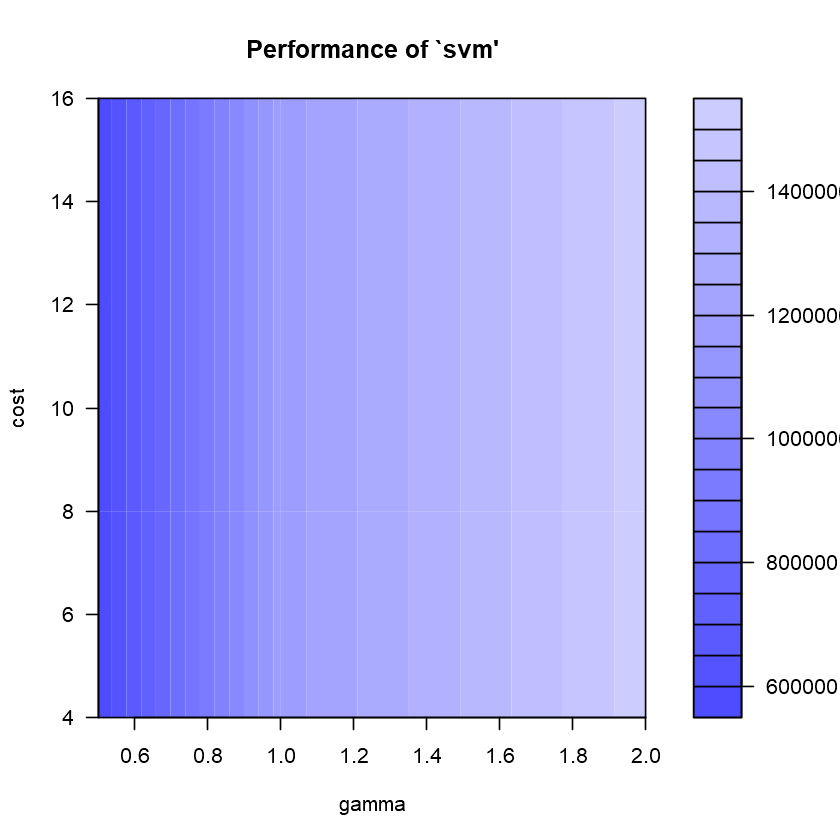

In [179]:
library(e1071)

obj <- tune(svm, cnt~., data = train,
ranges = list(gamma = 2^(-1:1), cost = 2^(2:4)),
tunecontrol = tune.control(sampling = "fix")
)
summary(obj)
plot(obj)

In [183]:
 mod9 <- svm(cnt~., train)
mod9


Call:
svm(formula = cnt ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03030303 
    epsilon:  0.1 


Number of Support Vectors:  192


In [184]:
pred9 <- predict(mod9,newdata=test)

rmse(test$cnt,pred9)
rmsle(test$cnt,pred9)


[1] 590.7754

[1] 0.2659049

In [185]:
real_test <- read.csv("test.csv")
head(real_test)
dim(real_test)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908


[1] 366  11

In [186]:
df["season_1"] = as.integer(df$season == 1)
df["season_2"] = as.integer(df$season == 2)
df["season_3"] = as.integer(df$season == 3)
df["season_4"] = as.integer(df$season == 4)

df["mnth_1"] = as.integer(df$mnth == 1)
df["mnth_2"] = as.integer(df$mnth == 2)
df["mnth_3"] = as.integer(df$mnth == 3)
df["mnth_4"] = as.integer(df$mnth == 4)
df["mnth_5"] = as.integer(df$mnth == 5)
df["mnth_6"] = as.integer(df$mnth == 6)
df["mnth_7"] = as.integer(df$mnth == 7)
df["mnth_8"] = as.integer(df$mnth == 8)
df["mnth_9"] = as.integer(df$mnth == 9)
df["mnth_10"] = as.integer(df$mnth == 10)
df["mnth_11"] = as.integer(df$mnth == 11)
df["mnth_12"] = as.integer(df$mnth == 12)

df["weekday_0"] = as.integer(df$weekday == 0)
df["weekday_1"] = as.integer(df$weekday == 1)
df["weekday_2"] = as.integer(df$weekday == 2)
df["weekday_3"] = as.integer(df$weekday == 3)
df["weekday_4"] = as.integer(df$weekday == 4)
df["weekday_5"] = as.integer(df$weekday == 5)
df["weekday_6"] = as.integer(df$weekday == 6)

df["weathersit_1"] = as.integer(df$weathersit == 1)
df["weathersit_2"] = as.integer(df$weathersit == 2)
df["weathersit_3"] = as.integer(df$weathersit == 3)

df["mnth"] <- NULL
df["weathersit"] <- NULL
df["weekday"] <- NULL
df["season"] <- NULL
df["atemp"] <- NULL


df$holiday <- as.factor(df$holiday)
df$workingday <- as.factor(df$workingday)

df["season_1"] = as.factor(df$season_1)
df["season_2"] = as.factor(df$season_2)
df["season_3"] = as.factor(df$season_3)
df["season_4"] = as.factor(df$season_4)

df["mnth_1"] = as.factor(df$mnth_1)
df["mnth_2"] = as.factor(df$mnth_2)
df["mnth_3"] = as.factor(df$mnth_3)
df["mnth_4"] = as.factor(df$mnth_4)
df["mnth_5"] = as.factor(df$mnth_5)
df["mnth_6"] = as.factor(df$mnth_6)
df["mnth_7"] = as.factor(df$mnth_7)
df["mnth_8"] = as.factor(df$mnth_8)
df["mnth_9"] = as.factor(df$mnth_9)
df["mnth_10"] = as.factor(df$mnth_10)
df["mnth_11"] = as.factor(df$mnth_11)
df["mnth_12"] = as.factor(df$mnth_12)

df["weekday_0"] = as.factor(df$weekday_0)
df["weekday_1"] = as.factor(df$weekday_1)
df["weekday_2"] = as.factor(df$weekday_2)
df["weekday_3"] = as.factor(df$weekday_3)
df["weekday_4"] = as.factor(df$weekday_4)
df["weekday_5"] = as.factor(df$weekday_5)
df["weekday_6"] = as.factor(df$weekday_6)

df["weathersit_1"] = as.factor(df$weathersit_1)
df["weathersit_2"] = as.factor(df$weathersit_2)
df["weathersit_3"] = as.factor(df$weathersit_3)



In [187]:

real_test$cnt <- predict(mod9,newdata=real_test)
real_test_sub <- real_test %>% select(id, cnt)

ERROR: Error in eval(predvars, data, env): object 'season_1' not found


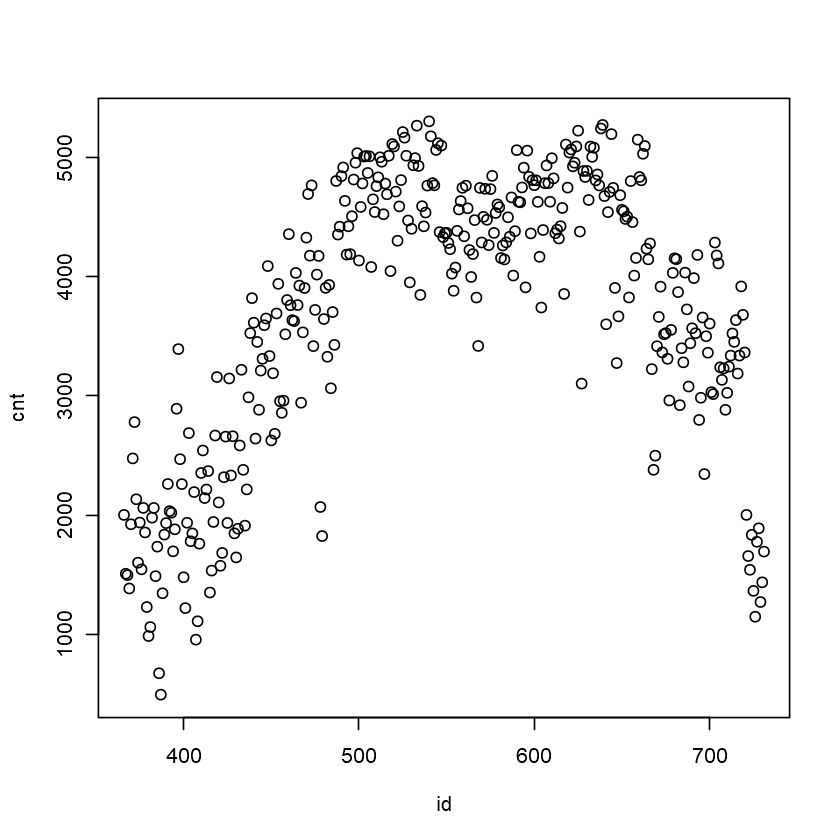

In [188]:


plot(real_test_sub)

In [189]:
write.csv(real_test_sub,"C:\\Users\\ytsat\\Documents\\DataScience\\ML\\Kaggle_Challenge\\SVM_v1.csv", row.names = FALSE)